In [ ]:
import sys, os

sys.path.append(os.pardir)

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Notes/딥러닝')

In [ ]:
# 교제 참고자료 불러오기
# !git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

# 1. 퍼셉트론

## 1. 퍼셉트론의 개념

퍼셉트론 : 다수의 신호를 입력으로 받아 하나의 신호를 출력

* 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여
* 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용
* 신호는 0과 1의 값을 갖는다
---
ex) 입력 신호가 2개 일때   
y = 0 if $(w1*x1 + w2*x2 <= theta)$  
y = 1 if $(w1*x1 + w2*x2 > theta)$

## 2. 단순한 논리회로

### AND 게이트

두 입력이 모두 1일 때만 1을 출력

|x1|x2|y|
|--|--|--|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|  

### NAND 게이트

두 입력이 모두 1일 때만 0을 출력

|x1|x2|y|
|--|--|--|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

### OR 게이트

두 입력 신호중 하나 이상이 1일때

|x1|x2|y|
|--|--|--|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

## 3. 퍼셉트론 구현하기


In [ ]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = w1*x1 + w2*x2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

In [ ]:
print(AND(0, 0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


# 신경망

## 1. 활성화 함수

* 입력신호를 출력신호로 바꿔줄 때 사용하는 함수
* $h(x)$를 이용하여 표현

### 시그모이드 함수

* $ h(x) = \frac{1}{1 + exp(-x)} $
* 퍼셉트론에서는 계단 함수를 활성화 함수로 사용하지만 신경망에서는 다른 함수를 이용

### 계단 함수 구현

* 입력이 0을 넘으면 1을 출력
* 그 외에는 0을 출력하는 함수

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
# 여러 인수를 받을 수 있는 계단 함수

def step_function1(x):
  y = x > 0
  return y.astype(int)

In [ ]:
import numpy as np

input_var = np.array([1, 2, 3])
step_function1(input_var)

array([1, 1, 1])

### 계단 함수의 그래프

* 0을 경계로 출력이 0에서 1(또는 1에서 0으로 변경)
* 값이 바뀌는 형태가 계단처럼 생겼기 때문에 계단함수라 부른다

In [ ]:
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype = int)

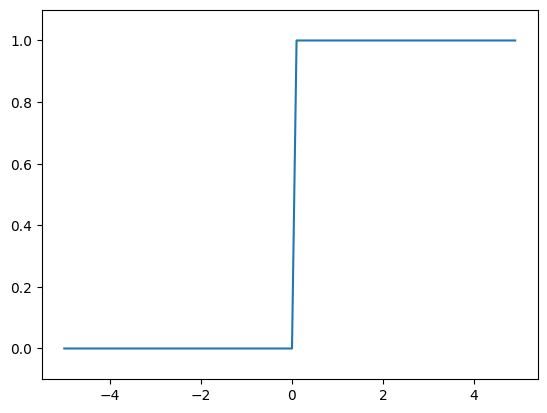

In [ ]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수 구현하기

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1, 1, 2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

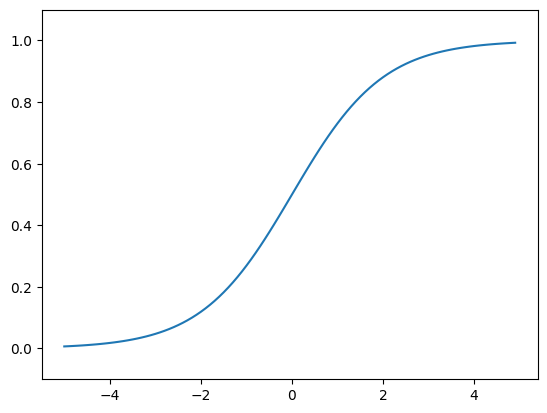

In [ ]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수와 계단함수의 비교

* 시그모이드 함수의 매끈함이 신경망 학습에서 중요한 역할을 함
* 퍼셉트론에서는 0과 1이 출력, 신경망에선느 연속적인 실수가 출력

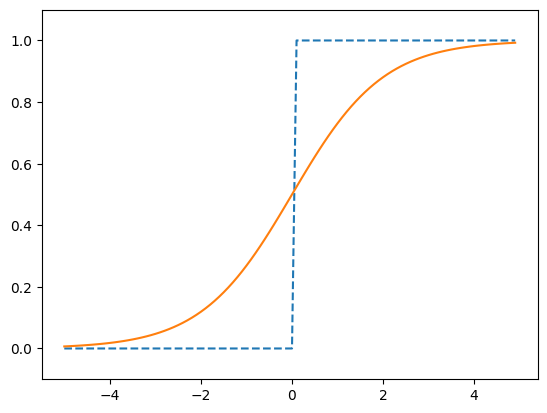

In [ ]:
x = np.arange(-5, 5, 0.1)
y1 = step_function1(x)
y2 = sigmoid(x)

plt.plot(x, y1, '--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
y2

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

활성화 함수는 비선형 함수를 사용 해야 함  
선형함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어진다

### ReLU 함수

$\ h(x) =
\begin{cases}
0,\;if\;x<0\\
x,\;if\;x\geq0
\end{cases}$

In [ ]:
def ReLU(x):
  return np.maximum(0, x)

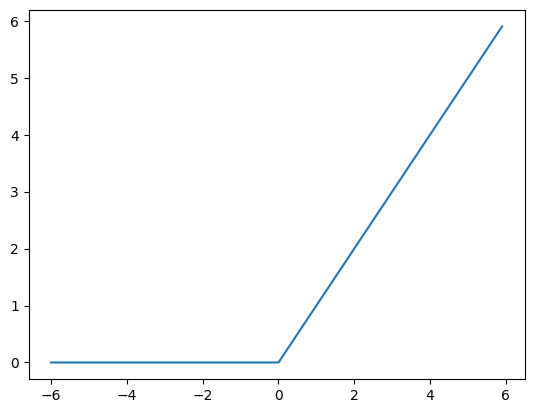

In [ ]:
x = np.arange(-6, 6, 0.1)
y = ReLU(x)

plt.plot(x,y)
plt.show()

## 2. 다차원 배열의 계산

### 1. 다차원 배열

In [ ]:
# 1차원 배열

import numpy as np

A = np.array([1, 2, 3, 4])
print(A)

print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [ ]:
# 2차원 배열

B = np.array([[1,2],
              [3,4],
              [4,5]])

print(np.ndim(B))
print(B.shape)

2
(3, 2)


In [ ]:
# 3차원 배열

C = np.array([[[1,2],
              [3,4],
              [5,6]],
              [[6,5],
               [4,3],
               [2,1]]])
print(np.ndim(C))
print(C.shape)

3
(2, 3, 2)


### 2. 행렬의 곱

In [ ]:
# [2*2] * [2*2]

A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)

print(np.dot(A, B)) #순서 주의

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [ ]:
# [3*2] * [2]

A = np.array([[1,2], [3,4], [5,6]])
B = np.array([1,2])
np.dot(A,B)

array([ 5, 11, 17])

### 3. 신경망에서의 행렬 곱

* 입력이 2개
* 출력이 3개
* 편향과 활성화 함수를 생략

In [ ]:
X = np.array([1, 2])
W = np.array([[3,4,5], [6,7,8]])
np.dot(X, W)

array([15, 18, 21])

##3. 3층 신경망 구현하기

* 입력층(0층) 2개
* 은닉층(1층) 3개
* 은닉층(2층) 2개
* 출력층(3층) 2개
* 편향 고려

### 1. 각층의 신호전달 구현

입력층 -> 은닉층(1층)

In [ ]:
import numpy as np

X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [ ]:
print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [ ]:
A1 = np.dot(X, W1) + B1
print(A1) #3개의 출력

[0.3 0.7 1.1]


In [ ]:
# 활성화 함수

Z1 = sigmoid(A1)
print(Z1) #다음단계로 가는 최종출력

[0.57444252 0.66818777 0.75026011]


은닉층(1층) -> 은닉층(2층)

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [ ]:
A2 = np.dot(Z1, W2) + B2
print(A2) # 2개 출력

[0.51615984 1.21402696]


In [ ]:
# 활성화 함수 적용

Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


은닉층(2층) -> 출력층(3층)

In [ ]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)

[0.31682708 0.69627909]


In [ ]:
# 출력층의 활성화 함수는 은닉층의 활성화 함수와 다르다

def identify_function(x):
    return x

Y = identify_function(A3)
print(Y) #최종 결과값

[0.31682708 0.69627909]


### 2. 구현 정리

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x): #forward : 신호가 순방향(입력에서 출력방향)으로 전달됨
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)

    return y

In [ ]:
network = init_network()

In [ ]:
x = np.array([1, 0.5]) #입력값

In [ ]:
y = forward(network, x)
print(y) #출력값

[0.31682708 0.69627909]


## 4. 출력층 설계

* 신경망은 분류와 회귀에 모두 이용가능
* 둘중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다

### 1. 항등함수와 소프트맥스 함수 구현

* 항등함수
    * 입력을 그대로 출력해주는 함수
* 소프트맥스함수
    * 분류를 위해 출력되는 값들의 합을 1로 만들어 확률화 시켜준다

In [ ]:
# 항등함수

def identify_function(x):
    return x

In [ ]:
# 소프트맥스 함수 구현

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
# 소프트맥스 함수

def softmax(x):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 2. 소프트맥스 함수 구현 시 주의점

* 지수함수의 특성상 입력값이 1000정도만 되도 오버 플로 발생
* 입력값의 가장큰값을 모든 원소들에 빼줘서 값을 조절해준다

In [ ]:
a = np.array([1010, 1000, 990])
softmax(a)

<ipython-input-40-35a2f5ad9956>:4: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-40-35a2f5ad9956>:6: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


array([nan, nan, nan])

In [ ]:
c = np.max(a)
print(a-c)

[  0 -10 -20]


In [ ]:
np.exp(a-c)/sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x - c)
    sum_exp_a = sum(np.exp(x-c))
    y = exp_a / sum_exp_a

    return y

In [ ]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 3. 소프트맥스 함수의 특징

* 출력의 총합은 1이된다 => 확률로 해석이 가능함
* 소프트맥스를 적용해도 각 원소의 대소 관계는 변하지 않음
    * 단조 증가함수를 이용하기 때문
---

* 신경망을 이용한 분류는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식
* 결과적으로 소프트맥스 함수를 생략해도 된다

In [ ]:
a = np.random.randint(0,10,10)
y = softmax(a)
print(y)

[8.81073847e-04 1.19240379e-04 4.81050021e-02 3.55450559e-01
 6.51030408e-03 4.81050021e-02 1.30762953e-01 4.81050021e-02
 6.51030408e-03 3.55450559e-01]


In [ ]:
sum(y)

0.9999999999999999

### 4. 출력층의 뉴런수 정하기

* 분류하고 싶은 클래스의 수로 정하는게 일반적이다

## 손글씨 숫자 인식

### 1. MNIST 데이터셋

* 손글씨 숫자 이미지 집합

In [ ]:
import numpy as np

In [ ]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/Notes/딥러닝/deep-learning-from-scratch/ch03')

MNIST image 출력

In [ ]:
import sys, os

sys.path.append(os.pardir)

In [ ]:
#shape 확인

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True,   #1차원으로 변환
                                                  normalize = False,    # 픽셀값을 0~1사이로 변환
                                                  one_hot_label = False)    # 결과 라벨을 원핫 인코딩
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
#이미지 로드

import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0] # image pixel information
label = t_train[0] # image label
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 2. 신경망의 추론 처리

* 입력층 뉴련 784개 출력층 뉴런 10개로 정의
  * 28 * 28 이미지 => 입력층 784
  * 10개의 이미지 레이블 => 출력층 10

* 은닉층
  * 첫번째 층 50개
  * 두번째 층 100개

In [ ]:
# data load function

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True,
                                                    flatten = True,
                                                    one_hot_label = False)
  return x_test, t_test

In [ ]:
import pickle

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f) #sample_weight.pkl 파일에 가중치가 저장돼있다.

    return network

In [ ]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()
network = init_network()

In [ ]:
acc_cnt = 0

for i, j in enumerate(x):
    y = predict(network, j)
    p = np.argmax(y)
    if p == t[i]:
        acc_cnt += 1

print(f'accuracy : {str(float(acc_cnt)/len(x))}')

accuracy : 0.9352


### 3. 배치 처리

In [ ]:
x, _ = get_data()
network = init_network()

In [ ]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

X(784) * (784,50) * (50*100) * (100*10) => Y(10)
* 하나의 이미지 입력

In [ ]:
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


이미지 여러장을 한꺼번에 입력하는 경우

X(100,784) * (784,50) * (50*100) * (100*10) => Y(100*10)

* 이러한 100장의 묶은 데이터를 배치라고 한다

In [ ]:
# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = []

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size, :]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt.append(np.sum(p == t[i:i+batch_size]))

print(f'accuracy : {np.array(accuracy_cnt)/100}') #각 배치별 정답율 확인

accuracy : [0.92 0.93 0.93 0.9  0.89 0.86 0.89 0.9  0.91 0.89 0.9  0.86 0.83 0.92
 0.89 0.89 0.88 0.82 0.85 0.85 0.87 0.86 0.96 0.85 0.87 0.86 0.92 0.93
 0.94 0.89 0.95 0.91 0.91 0.92 0.9  0.9  0.94 0.88 0.81 0.86 0.85 0.94
 0.91 0.89 0.9  0.92 0.89 0.93 0.89 0.89 0.92 0.95 0.97 0.99 0.99 0.98
 0.92 0.95 0.96 0.93 0.85 0.95 1.   0.97 0.92 0.88 0.91 0.89 0.99 0.98
 0.96 0.98 0.95 0.99 0.92 0.97 0.99 0.98 0.92 0.9  0.93 0.99 0.94 0.94
 0.97 0.96 0.99 1.   1.   1.   0.87 0.96 0.95 0.99 0.97 0.94 0.93 0.85
 0.87 0.91]


3장 요약

* 퍼셉트론과 달리 신경망에는 활성화함수가 있다
* 활성화 함수의 종류로는 ReLU, sigmoid, softmax 함수 등이 있다
* numpy 다차원 배열을 통해 신경망을 효율적으로 구성할 수 있다
* 입력데이터를 묶은 것을 배치라 하며 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다


# 신경망 학습

## 1. 데이터를 통한 학습

* 신경망에서 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 획득하는것을 의미한다


## 2. 손실함수

* 성능의 나쁨을 나타내는 지표
* 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하느냐를 의미

### 1. 평균 제곱오차(MSE)

$E = \frac{1}{2}\displaystyle\sum_{k}{(y_k-t_k)^2}$

In [ ]:
def mse(y, t):
    if len(y) == len(t):
        return (1/2) * np.sum((y-t)**2)
    else:
        return print('length not match')

In [ ]:
# y: 신경망의 출력, t : 정답 레이블

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 레이블이 2일때

# 2일 확률이 가장 높다고 추정함

y1 = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
print(f'case1: {mse(np.array(y1), np.array(t))}')

# 7일 확률이 가장 높다고 추정

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6 , 0.0, 0.0]
print(f'case2: {mse(np.array(y2), np.array(t))}')


# -> 손실함수를 확인했을때 더 작은 첫번째 추정결과가 정답에 더 가까울거라 예상 가능

case1: 0.09750000000000003
case2: 0.5975


### 2. 교차 엔트로피 오차

$E = -\displaystyle\sum_{k}{t_klogy_k}$ (log는 밑이 e인 자연로그)

$y_k$ : 신경망의 출력  
$t_k$ : 정답 레이블

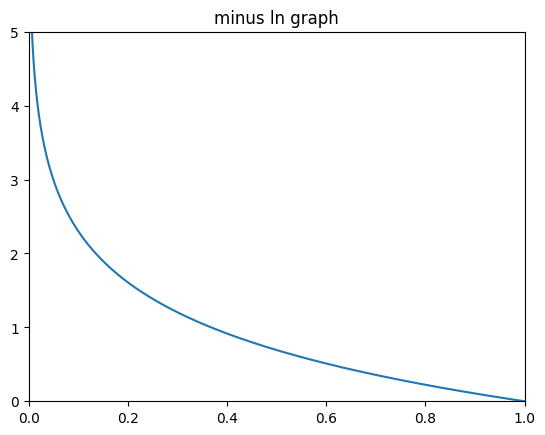

In [ ]:
x = np.linspace(0,1, 1000)
y = np.log(x + 0.00001)

plt.plot(x,-y)
plt.ylim(0,5)
plt.xlim(0,1)
plt.title('minus ln graph')
plt.show()

# -> y값이(정답 레이블의 확률)이 커질수록 Error값이 작아진다

In [ ]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [ ]:
# y: 신경망의 출력, t : 정답 레이블

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 레이블이 2일때

# 2일 확률이 가장 높다고 추정함

y1 = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
print(f'case1: {cross_entropy_error(np.array(y1), np.array(t))}')

# 7일 확률이 가장 높다고 추정

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6 , 0.0, 0.0]
print(f'case2: {cross_entropy_error(np.array(y2), np.array(t))}')


# -> 손실함수를 확인했을때 더 작은 첫번째 추정결과가 정답에 더 가까울거라 예상 가능
# -> 평균제곱오차(mse)와 판단이 일치함

case1: 0.510825457099338
case2: 2.3025840929945454


### 3. 미니배치학습

* 훈련데이터를 통해 손실함수를 구한다
* 모든 훈련데이터에 대한 손실함수의 합을 구하는 방법

교차 엔트로피 함수

$E = -\frac{1}{n}\displaystyle\sum_{n}\sum_{k}{t_{n,k}logy_{n,k}}$

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True,
                                                  flatten = True,
                                                  one_hot_label = False)

In [ ]:
# batch size가 10일때

np.random.seed(10)
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #60000중 무작위로 10개의 숫자 추출
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)

[17673 40061 29199 50496 28017 40059  9372 10201 37597 17904]


### 5. (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    result = -np.sum(t*np.log(y+1e-7)) / batch_size
    return result

코드 해석

* y.ndim == 1일때 왜 reshape을 사용하는가

In [ ]:
y1 = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_array = np.array(y1)
y_r = y_array.reshape(1,y_array.size)

In [ ]:
t_array = np.array(t)
t_r = t_array.reshape(1, t_array.size)

In [ ]:
print(y_array)
print(y_array.shape)
print(y_r)
print(y_r.shape)

[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
(10,)
[[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]]
(1, 10)


In [ ]:
print(y_array.shape[0])
print(y_r.shape[0])

# -> 자료가 1개 즉 batch_size가 1인데 reshape을 안해준다면 batch_size가 10이된다.
# -> 즉 batch_size가 1일때 batch_size가 2 이상일때와 동일하게 맞춰준다

10
1


In [ ]:
-np.sum(t_r * np.log(y_r + 1e-7))

# -> reshape을 해줘도 연산은 제대로 잘된다.

0.510825457099338

In [ ]:
# 정답레이블이 원핫 인코딩 변환이 안되있는 경우

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    result = -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    return result

코드 해석

* y[np.arange(batch_size),t]

In [ ]:
# batch_size가 3일경우

y = np.array([[0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0],
              [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0],
              [0.1, 0.05, 0.1, 0, 0.05, 0.6, 0, 0.1, 0, 0]])

y[np.arange(3), np.array([2,7,5])] # 정답 레이블만의 신경망의 출력을 추출해준다

array([0.6, 0.6, 0.6])

### 5. 손실함수를 사용하는 이유

* 정확도라는 지표가 있는데 손실함수를 왜 사용하는가?
    * 최적의 매개변수를 탐색할 때 손실함수의 값을 가능한 작게 하는 매개변수 값을 찾는다
    * 이때 미분을 활용하게 됨
    * 손실함수를 가중치 매개변수 값으로 미분을 해준다면 매개변수값의 변화량과 그애 따른 손실함수의 변화를 수치화 가능



예시)

* 정확도가 지표일때
    * 100장의 훈련데이터 중 32장을 올바로 인식한다고 하면
    * 매개변수의 값을 조절해도 정확도가 불연속 하게 바뀐다 즉   
    => 32%의 정확도가 개선해서 34장을 맞춘다면 34%의 정확도가 된다

* 손실함수가 지표일때
    * 손실함수의 값이 0.8381xx 같은 연속 수치로 나타남
    * 매개변수의 값이 변하면 손실함수의 값도 연속적으로 변화함

## 3. 수치미분

* 해석적 미분 : 우리가 수업시간 때 배웠던 $x^2$ 미분 => $2x$
    * 따라서 해석적 미분은 오차를 포함하지 않는 진정한 미분 값을 구해준다
    
* 수치 미분 : 근사치로 기울기를 계산하는 방법

### 1. 미분

미분 구현

In [ ]:
#나쁜구현
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [ ]:
# h의 값이 너무 작아서 구현이 안됨

np.float32(1e-50) #np.float64일때는 구현 됨

0.0

In [ ]:
# 전방차분의 한계 -> 중앙차분으로 변환

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / 2*h

### 2. 수치 미분의 예

$ f = 0.01x^2 + 0.1x$

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
numerical_diff(function_1, 5)

#해석적미분의 2와 거의 같은값으로 볼 수 있을 정도로 오차가 작다

1.9999999999908982e-09

### 3. 편미분

$ f(x_0, x_1) = x_0^2 + x_1^2$

* $x_0 = 3, x_1 = 4$ 일때 $x1, x2$에 대한 각각의 편미분을 구하라
* $\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$



In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
def function_tmp1(x0):
    return x0*x0 + 4 ** 2

In [ ]:
numerical_diff(function_tmp1, 3) #x0에 대한 편미분 계수

6.000000000003781e-08

In [ ]:
def function_tmp2(x1):
    return 3**2 + x1*x1

In [ ]:
numerical_diff(function_tmp2, 4)

7.999999999999119e-08

## 4. 기울기

* 기울기가 가리기는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향

### 1. 경사법(경사 하강법)

* 기울기를 잘이용해 함수의 최솟값(또는 가능한 작은 값)을 찾으려는 것이 경사법
* 함수가 복잡해지면 기울기의 방향에 최솟값이 없을수도 있다

수식

$ x_0 = x_0 - \eta * \frac{\partial f}{\partial x_0} $  
$ x_1 = x_1 - \eta * \frac{\partial f}{\partial x_1} $  


$\eta$ 는 신경망에서 학습률을 의미

기울기 함수 구현

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [ ]:
input_x = np.array([3.0,])

$f(x_0, x_1) = x_0^2 + x_1^2 $ 함수의 gradient확인

In [ ]:
numerical_gradient(function_2, np.array([3,4])) #값을 입력할 때 정수형으로 넣으면 올바른 값이 나오지 않음

array([25000, 35000])

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

경사하강법 구현

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(f = function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

학습률에 따라 비교

In [ ]:
# 학습률이 클 때 : lr = 10

init_x = np.array([-3.0, 4.0])
gradient_descent(f = function_2, init_x = init_x, lr = 10, step_num = 100)

# -> 너무 큰값으로 발산함

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 학습률이 클 때 : lr = 1e-10

init_x = np.array([-3.0, 4.0])
gradient_descent(f = function_2, init_x = init_x, lr = 1e-10, step_num = 100)

# -> 거의 갱신되지 않고 끝남

array([-2.99999994,  3.99999992])

### 2. 신경망에서의 기울기

simpleNet확인

* 입력이 2개 출력이 3개 인 단순한 신경망

In [ ]:
# simpleNet클래스

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #가중치 초기값으로 랜덤한값 부여

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [ ]:
net = simpleNet()
print(net.W)

[[-0.90561048 -0.89808938  0.45187984]
 [-0.85947418 -0.53479453  1.03287114]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p) # 최대값의 인덱스

t = np.array([0,0,1]) # 정답 레이블
net.loss(x,t)

[-1.31689305 -1.0201687   1.20071193]


0.17325214207093917

In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

# f = lambda w: net.loss(x, t) // 간단하게 함수 구현 가능

[[ 0.04069366  0.05475106 -0.09544472]
 [ 0.06104049  0.08212658 -0.14316707]]


왜 f(W)로 net.loss(x, t)를 지정하는가?

In [ ]:
import traceback

try:
    numerical_gradient(net.loss(x, t), net.W)

except:
    print(traceback.format_exc())

# -> object를 부를수 없다고 함

Traceback (most recent call last):
  File "<ipython-input-101-893015afc5dc>", line 4, in <cell line: 3>
    numerical_gradient(net.loss(x, t), net.W)
  File "/content/drive/MyDrive/Colab Notebooks/Notes/딥러닝/deep-learning-from-scratch/ch03/../common/gradient.py", line 43, in numerical_gradient
    fxh1 = f(x) # f(x+h)
TypeError: 'numpy.float64' object is not callable



In [ ]:
#numerical_gradient 함수 구성 요소
import inspect

code = inspect.getsource(numerical_gradient)
print(code)


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad



In [ ]:
# x, t변수를 같이 사용하기 위해?

x = 3
y = 123
g = lambda c : x**2 + y

def test_func(h, x):
    x += 3
    res = h(x)
    return res

test_func(g, 3)

132

## 5. 전체 학습 알고리즘 구현

전체
* 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라고 한다.
---
1. 미니배치
* 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표

2. 기울기 산출
* 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시한다

3. 매개변수 갱신
* 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다

4. 반복
* 1단계 ~ 3단계를 반복


확률적 경사하강법

* 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사하강법이라는 의미
* stochastic gradient discent

### 1. 2층 신경망 클래스 구현하기

손글씨 숫자를 학습하는 신경망을 구현

* 2층신경망(은닉층이 1개)

In [ ]:
import os

os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Notes/딥러닝/deep-learning-from-scratch/ch03'

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Notes/딥러닝/deep-learning-from-scratch')

In [ ]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [ ]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)

In [ ]:
# 더미데이터 예측

x = np.random.rand(100, 784) #더미 입력데이터
y = net.predict(x)

In [ ]:
# 더미데이터 예측 기울기 계산
import time

x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

start = time.time()
grads = net.numerical_gradient(x, t)
grads['W1']
print(f'계산 소요 시간 : {time.time() - start}')

계산 소요 시간 : 145.66309690475464


In [ ]:
grads['W1'].shape

(784, 100)

### 2. 미니배치 학습 구현하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

#hyper parameter

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

start = time.time()

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) #기존에 사용하던 방식, 속도가 매우느림
    grad = network.gradient(x_batch, t_batch) #오차 역전파 방식

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print(f'소요시간 : {time.time() - start}')

소요시간 : 32.27141833305359


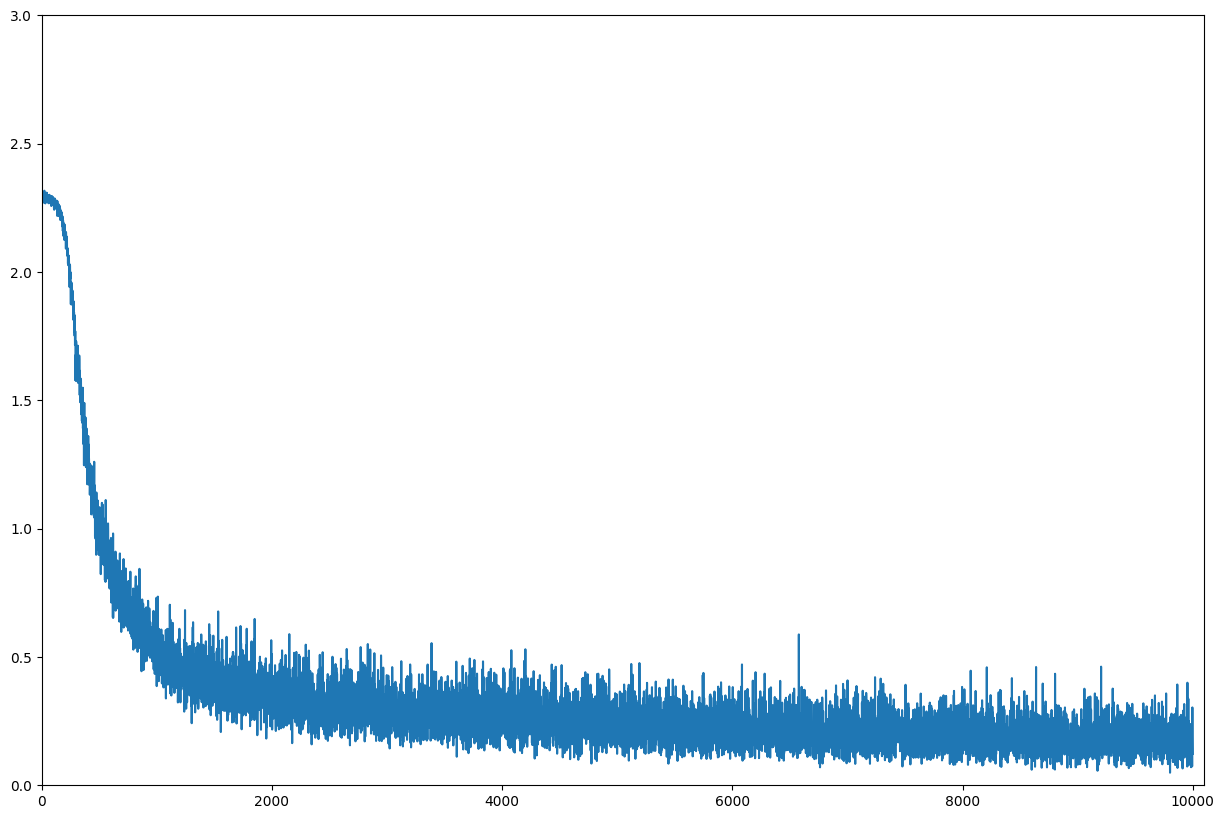

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(train_loss_list)
plt.ylim(0, 3)
plt.xlim(0, 10100)
plt.show()

### 3. 시험데이터로 평가하기

* 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록

* 여기서는 1에폭별로 훈련데이터와 시험데이터에 대한 정확도를 기록

에폭(epoch)

* 하나의 단위
* 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다
    * 예를들어 훈련데이터 10,000개를 100개의 미니배치로 학습 할 경우, 확률적 경사하강법을 100회 반복하면 모든 훈련 데이터를 소진하게 된다
    * 이경우 100회가 1에폭이 된다

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True,
                                                  one_hot_label = True)


network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

# hyper parameter

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# one epoch 당 반복 수
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'train acc : {train_acc}, test_acc : {test_acc}')

train acc : 0.10441666666666667, test_acc : 0.1028
train acc : 0.7783666666666667, test_acc : 0.7848
train acc : 0.8745666666666667, test_acc : 0.8772
train acc : 0.8966666666666666, test_acc : 0.9
train acc : 0.9070666666666667, test_acc : 0.9108
train acc : 0.91375, test_acc : 0.9159
train acc : 0.9192333333333333, test_acc : 0.9217
train acc : 0.9236333333333333, test_acc : 0.9267
train acc : 0.9265833333333333, test_acc : 0.9301
train acc : 0.9308, test_acc : 0.9322
train acc : 0.9339333333333333, test_acc : 0.9343
train acc : 0.9370833333333334, test_acc : 0.9366
train acc : 0.9389666666666666, test_acc : 0.9394
train acc : 0.9411666666666667, test_acc : 0.9412
train acc : 0.9432, test_acc : 0.9416
train acc : 0.9451666666666667, test_acc : 0.9434
train acc : 0.9470666666666666, test_acc : 0.9452


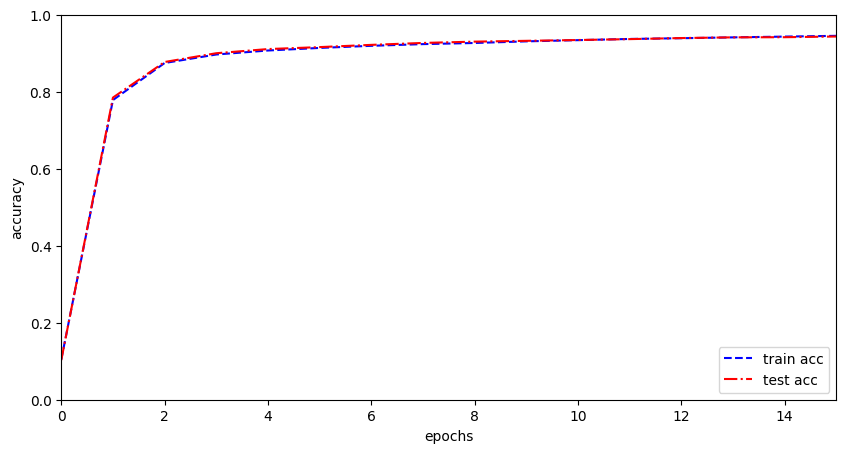

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(train_acc_list, 'b--', label = 'train acc')
plt.plot(test_acc_list, 'r-.', label = 'test acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xlim(0, 15)
plt.ylim(0, 1)
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
train_acc

0.9470666666666666

## 6. 정리

* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 매개변수를 갱신한다
* 수치 미분을 이용한 계산에는 시간이 걸리지만 그 구현은 간단하다. 하지만 시간이 오래걸린다.
* 오차역전파법은 기울기를 고속으로 구할 수 있다.

# 오차역전파법

## 1. 계산 그래프